# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети (CNN)

## Домашнее задание

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10
2. оценить рост точности при увеличении ширины сети (больше фильтров)
3. оценить рост точности при увеличении глубины сети (больше слоев)
4. *сравнить с точностью полносвязной сети для этой выборки


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
import os
from sklearn.metrics import classification_report

In [2]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


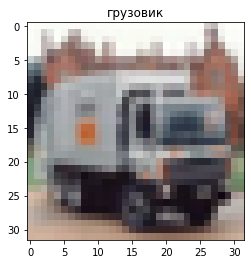

In [4]:
N = 11

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [5]:
results = pd.DataFrame(columns=['Sample', 'Train', 'Test', 'Test loss', 'Test accuracy']) # сводная таблица результатов

batch_size = 512
epochs = 10

step = [] # шаг
desc = [] # описание

train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

### 1. Обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10

In [6]:
from tensorflow.keras.losses import categorical_crossentropy

# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()
# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [7]:
model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 58s 585ms/step - loss: 2.3009 - accuracy: 0.1000 - val_loss: 2.2882 - val_accuracy: 0.1074
Epoch 2/10
98/98 [==============================] - 58s 590ms/step - loss: 2.2836 - accuracy: 0.1199 - val_loss: 2.2619 - val_accuracy: 0.1587
Epoch 3/10
98/98 [==============================] - 55s 563ms/step - loss: 2.2483 - accuracy: 0.1751 - val_loss: 2.1783 - val_accuracy: 0.2122
Epoch 4/10
98/98 [==============================] - 53s 543ms/step - loss: 2.1556 - accuracy: 0.2223 - val_loss: 2.1038 - val_accuracy: 0.2299
Epoch 5/10
98/98 [==============================] - 56s 569ms/step - loss: 2.0798 - accuracy: 0.2561 - val_loss: 2.0111 - val_accuracy: 0.2903
Epoch 6/10
98/98 [==============================] - 56s 569ms/step - loss: 2.0247 - accuracy: 0.2798 - val_loss: 1.9684 - val_accuracy: 0.3085
Epoch 7/10
98/98 [==============================] - 57s 581ms/step - loss: 1.9554 - accuracy: 0.3099 - val_loss: 1.8796 - val_accuracy: 0.3455

In [8]:
# проверка работы обученной модели
train_loss, train_m = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_m = model.evaluate(X_test, y_test, verbose=1)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Baseline')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

313/313 [==============================] - 4s 11ms/step - loss: 1.7097 - accuracy: 0.3948
train_loss: 1.7107512950897217, train_accuracy: 0.3982999920845032
test_loss: 1.7097370624542236, test_accuracy: 0.39480000734329224


313/313 [==============================] - 4s 12ms/step - loss: 1.7097 - accuracy: 0.3948
Test loss: 1.7097370624542236
Test accuracy: 0.39480000734329224


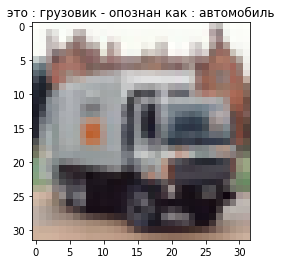

In [9]:
N = 11
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

new_row = {'Sample':'Baseline', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'Test loss':round(scores[0], 4), 'Test accuracy':round(scores[1], 4)}

results = results.append(new_row, ignore_index=True)

In [10]:
results

,Sample,Train,Test,Test loss,Test accuracy
0,Baseline,грузовик,автомобиль,1.7097,0.3948


### 2. Оценить рост точности при увеличении ширины сети (больше фильтров)

In [11]:
# конфигурирование слоев нейросети
model2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# полносвязные слои нейронной сети
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()
# компиляция модели
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)       36992     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [12]:
model2.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/10
98/98 [==============================] - 90s 913ms/step - loss: 2.2972 - accuracy: 0.1314 - val_loss: 2.2781 - val_accuracy: 0.1487
Epoch 2/10
98/98 [==============================] - 90s 922ms/step - loss: 2.2655 - accuracy: 0.1688 - val_loss: 2.1980 - val_accuracy: 0.2178
Epoch 3/10
98/98 [==============================] - 91s 933ms/step - loss: 2.1574 - accuracy: 0.2425 - val_loss: 2.0731 - val_accuracy: 0.2676
Epoch 4/10
98/98 [==============================] - 93s 946ms/step - loss: 2.0646 - accuracy: 0.2589 - val_loss: 2.0283 - val_accuracy: 0.2756
Epoch 5/10
98/98 [==============================] - 91s 927ms/step - loss: 2.0047 - accuracy: 0.2844 - val_loss: 1.9557 - val_accuracy: 0.3049
Epoch 6/10
98/98 [==============================] - 92s 940ms/step - loss: 1.9370 - accuracy: 0.3098 - val_loss: 1.8790 - val_accuracy: 0.3390
Epoch 7/10
98/98 [==============================] - 90s 920ms/step - loss: 1.9063 - accuracy: 0.3257 - val_loss: 1.8416 - val_accuracy: 0.3482

In [13]:
# проверка работы обученной модели
train_loss, train_m = model2.evaluate(X_train, y_train, verbose=1)
test_loss, test_m = model2.evaluate(X_test, y_test, verbose=1)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('More filters')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

313/313 [==============================] - 6s 18ms/step - loss: 1.7643 - accuracy: 0.3690
train_loss: 1.7635767459869385, train_accuracy: 0.3688800036907196
test_loss: 1.7642849683761597, test_accuracy: 0.36899998784065247


313/313 [==============================] - 6s 18ms/step - loss: 1.7643 - accuracy: 0.3690
Test loss: 1.7642849683761597
Test accuracy: 0.36899998784065247


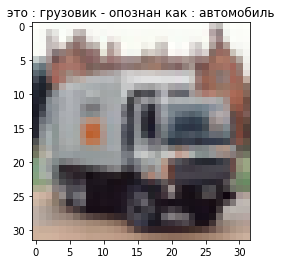

In [14]:
N = 11
scores = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

new_row = {'Sample':'With more filters', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'Test loss':round(scores[0], 4), 'Test accuracy':round(scores[1], 4)}

results = results.append(new_row, ignore_index=True)

In [15]:
results

,Sample,Train,Test,Test loss,Test accuracy
0,Baseline,грузовик,автомобиль,1.7097,0.3948
1,With more filters,грузовик,автомобиль,1.7643,0.3690


### 3. Оценить рост точности при увеличении глубины сети (больше слоев)

In [16]:
# конфигурирование слоев нейросети
model3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))


# полносвязные слои нейронной сети
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10))
model3.add(Activation('softmax'))

model3.summary()
# компиляция модели
model3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [17]:
history_3 = model3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))    

Epoch 1/10
98/98 [==============================] - 59s 592ms/step - loss: 2.3084 - accuracy: 0.1034 - val_loss: 2.3016 - val_accuracy: 0.1338
Epoch 2/10
98/98 [==============================] - 60s 608ms/step - loss: 2.3034 - accuracy: 0.1022 - val_loss: 2.3008 - val_accuracy: 0.1523
Epoch 3/10
98/98 [==============================] - 59s 601ms/step - loss: 2.3014 - accuracy: 0.1057 - val_loss: 2.3003 - val_accuracy: 0.1497
Epoch 4/10
98/98 [==============================] - 59s 602ms/step - loss: 2.3007 - accuracy: 0.1080 - val_loss: 2.2996 - val_accuracy: 0.1510
Epoch 5/10
98/98 [==============================] - 60s 613ms/step - loss: 2.2993 - accuracy: 0.1111 - val_loss: 2.2985 - val_accuracy: 0.1593
Epoch 6/10
98/98 [==============================] - 59s 603ms/step - loss: 2.2979 - accuracy: 0.1178 - val_loss: 2.2967 - val_accuracy: 0.1681
Epoch 7/10
98/98 [==============================] - 62s 630ms/step - loss: 2.2949 - accuracy: 0.1289 - val_loss: 2.2936 - val_accuracy: 0.1750

In [18]:
# проверка работы обученной модели
train_loss, train_m = model3.evaluate(X_train, y_train, verbose=1)
test_loss, test_m = model3.evaluate(X_test, y_test, verbose=1)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('More layers')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))


313/313 [==============================] - 4s 12ms/step - loss: 2.2496 - accuracy: 0.2152
train_loss: 2.2508089542388916, train_accuracy: 0.2128400057554245
test_loss: 2.2496213912963867, test_accuracy: 0.2152000069618225


313/313 [==============================] - 4s 14ms/step - loss: 2.2496 - accuracy: 0.2152
Test loss: 2.2496213912963867
Test accuracy: 0.2152000069618225


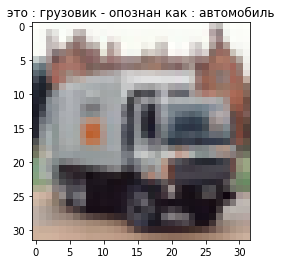

In [19]:
N = 11
scores = model3.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

new_row = {'Sample':'With more layers', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'Test loss':round(scores[0], 4), 'Test accuracy':round(scores[1], 4)}

results = results.append(new_row, ignore_index=True)

In [20]:
results

,Sample,Train,Test,Test loss,Test accuracy
0,Baseline,грузовик,автомобиль,1.7097,0.3948
1,With more filters,грузовик,автомобиль,1.7643,0.3690
2,With more layers,грузовик,автомобиль,2.2496,0.2152


### 4.\* Сравнить с точностью полносвязной сети для этой выборки.

In [21]:
# конфигурирование слоев нейросети
model4 = Sequential()

# полносвязные слои нейронной сети
model4.add(Flatten(input_shape=X_train.shape[1:]))
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10))
model4.add(Activation('softmax'))

model4.summary()
# компиляция модели
model4.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
____________________________________________

In [22]:
history_4 = model4.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
98/98 [==============================] - 3s 24ms/step - loss: 2.3047 - accuracy: 0.1604 - val_loss: 2.0223 - val_accuracy: 0.3110
Epoch 2/10
98/98 [==============================] - 2s 21ms/step - loss: 2.0403 - accuracy: 0.2698 - val_loss: 1.9454 - val_accuracy: 0.3406
Epoch 3/10
98/98 [==============================] - 3s 30ms/step - loss: 1.9815 - accuracy: 0.2939 - val_loss: 1.8998 - val_accuracy: 0.3460
Epoch 4/10
98/98 [==============================] - 2s 22ms/step - loss: 1.9410 - accuracy: 0.3096 - val_loss: 1.8683 - val_accuracy: 0.3590
Epoch 5/10
98/98 [==============================] - 2s 22ms/step - loss: 1.8999 - accuracy: 0.3286 - val_loss: 1.8426 - val_accuracy: 0.3700
Epoch 6/10
98/98 [==============================] - 2s 25ms/step - loss: 1.8779 - accuracy: 0.3409 - val_loss: 1.8194 - val_accuracy: 0.3727
Epoch 7/10
98/98 [==============================] - 2s 21ms/step - loss: 1.8619 - accuracy: 0.3428 - val_loss: 1.7994 - val_accuracy: 0.3820
Epoch 8/10
98

In [23]:
# проверка работы обученной модели
train_loss, train_m = model4.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model4.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Fully connected networks')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))


1563/1563 - 2s - loss: 1.7524 - accuracy: 0.3971
313/313 - 1s - loss: 1.7586 - accuracy: 0.3931
train_loss: 1.7524369955062866, train_accuracy: 0.39711999893188477
test_loss: 1.7585598230361938, test_accuracy: 0.39309999346733093


313/313 [==============================] - 1s 2ms/step - loss: 1.7586 - accuracy: 0.3931
Test loss: 1.7585598230361938
Test accuracy: 0.39309999346733093


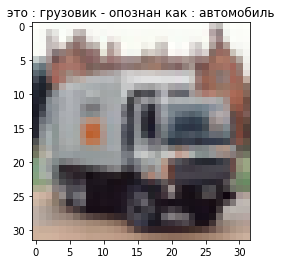

In [24]:
N = 11
scores = model4.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_p = model.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

new_row = {'Sample':'With fully connected networks', 'Train':classes[y_t[0]], 'Test': classes[y_i[0]], \
           'Test loss':round(scores[0], 4), 'Test accuracy':round(scores[1], 4)}

results = results.append(new_row, ignore_index=True)

In [25]:
results

,Sample,Train,Test,Test loss,Test accuracy
0,Baseline,грузовик,автомобиль,1.7097,0.3948
1,With more filters,грузовик,автомобиль,1.7643,0.3690
2,With more layers,грузовик,автомобиль,2.2496,0.2152
3,With fully connected networks,грузовик,автомобиль,1.7586,0.3931


## Выводы:

**Получилось странное явление в том, что увеличение фильтров и увеличение слоёв привело к снижению тестовой точности.
Это видимо связано с недостаточно правильной настройкой параметров, иначе эти показатели, а особенно показатель полносвязной сети должны были показать максимально высокие результаты тестовой точности.**